In [170]:
pip install sunpy


Note: you may need to restart the kernel to use updated packages.


In [140]:
pip install zeep drms

Note: you may need to restart the kernel to use updated packages.


#### Tópicos de Astronomía y Astrofísica
#### Tarea Programada 

##### Estudiante:
Jorge Ruiz Murillo (2019024200)

##### Profesor:
Jose Esteban Pérez Hidalgo

##### I Semestre 2022

# Regiones brillantes del sol 



En la imagen se capta un Flare, los cuales son explosiones energéticas y durante estas explosiones es cuando se alcanzan las temperaturas más altas en el sol. Estos son producidos por la aceleración de partículas durante la reconexión magnética.

Son precursores de Eyecciones de Masa Coronal las cuales son burbujas gigantes de plasma y se desplazan por el espacio. Además pueden golpear planetas.



### Bibliotecas necesarias

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage

import astropy.units as u

import sunpy.map
from sunpy.net import Fido,attrs as a
from sunpy.map.maputils import all_coordinates_from_map

### Base de datos
Se establece una hora de inicio y final donde se buscará data en el repositorio Solar Dynamics Observatory (SDO) por medio de un cliente FIDO

In [3]:
timerange=a.Time('2022-05-10T13:55:00','2022-05-10T13:55:15')
instrument = a.Instrument.aia
wavelength= a.Wavelength(171*u.angstrom)
result = Fido.search(timerange, instrument,wavelength)

file_download=Fido.fetch(result)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Se descarga un segmento de la data

In [4]:
aia=sunpy.map.Map(file_download[0])
aia4=sunpy.map.Map(file_download[0])

### Regiones más brillantes
Se evalúa cuáles regiones son más brillantes aplicando una máscara, se utiliza el criterio que deberían ser al menos el 10% del valor máximo. Los pixeles con una intensidad más grande que esta es incluido 

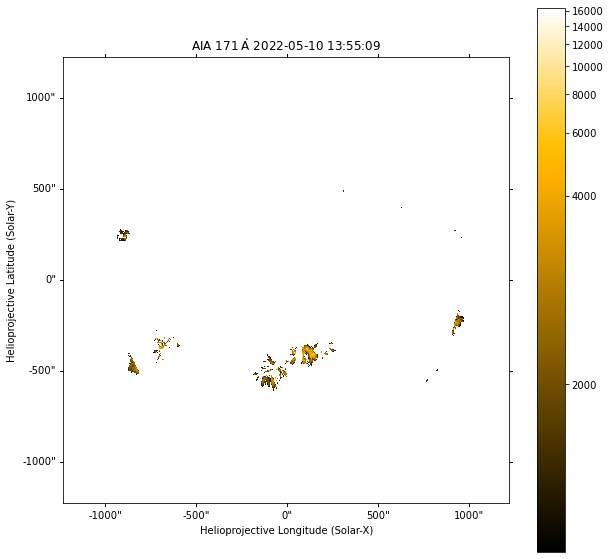

In [5]:
mask = aia4.data < aia4.max() * 0.10
aia4.mask = mask

plt.figure(figsize=(10,10))
aia4.plot()
plt.colorbar()

plt.show()

Se aplica un suavizado a los datos de la imagen aplicando un función de suavizado gaussiano 2D a los datos. Además, se hace el cálculo del número de regiones que presentan los píxeles más brillantes.
Asimismo, se evalúa cuál es el píxel más brillante y esta se transforma en coordena de píxel

In [6]:
data = ndimage.gaussian_filter(aia4.data * ~mask, 14)
data[data < 100] = 0
aiamap = sunpy.map.Map(data, aia4.meta)
labels, n = ndimage.label(aiamap.data)

pixel_pos = np.argwhere(aia.data == aia.data.max()) * u.pixel
hpc_max = aia.pixel_to_world(pixel_pos[:, 1], pixel_pos[:, 0])


## Imagen original

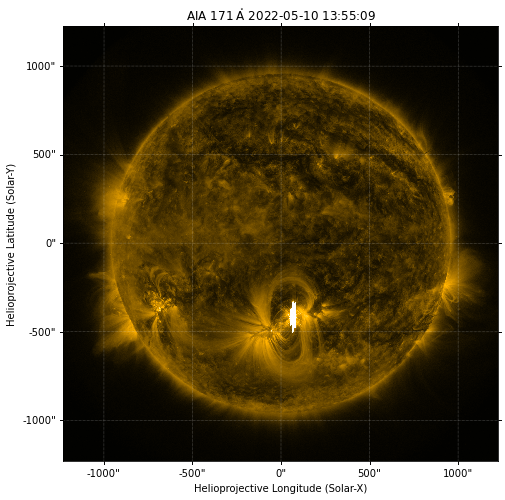

In [10]:
plt.figure(figsize=(8,8))
aia.plot()
plt.show()

## Zonas más brillantes

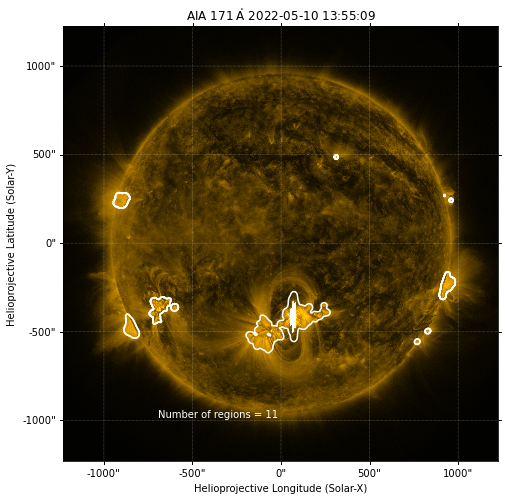

In [11]:
plt.figure(figsize=(8,8))
aia.plot()
plt.contour(labels,colors=['white'])
plt.figtext(0.3, 0.2, f'Number of regions = {n}', color='white')

plt.show()

##  Zona más brillante

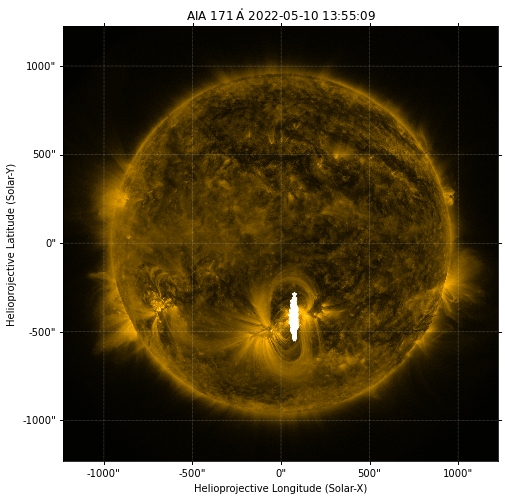

In [15]:
fig2 = plt.figure(figsize=(8,8))
ax = fig2.add_subplot(projection=aia4)
aia.plot(axes=ax)
ax.plot_coord(hpc_max, color='white', marker='*', markersize=4)
plt.show()